# Numerical Optimization Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package **SciPy**. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function that has the minimal point at [1,1]. (https://en.wikipedia.org/wiki/Rosenbrock_function) We provide a visualization function which draws the contour.
## Task
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer to the information in the following link: https://docs.scipy.org/doc/scipy/reference/optimize.html
2. Please apply SciPy library of the optimization algorithm of _BFGS_, _Conjugate Gradient_, _Modified Newton's method with conjugate gradient_ with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer to page 11 of unit 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer to page 18 of unit 2.
5. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm.
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/, and Markdown syntax: https://www.markdownguide.org/basic-syntax/
6. Rename this notebook file by adding your student ID and upload it to eeclass platform. (ex. hw1_110xxxxxx.ipynb)
7. Please make sure that clicking "Restart & Run All" will give the result you want to show.

## Import packages and visualization
If you imported extra packages, please mention in your report.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [3]:
def visualize(x_iter):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2.5,2.5,1000)
    y = np.linspace(-3.5,3.5,1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title('Contour')
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## BFGS (10%)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


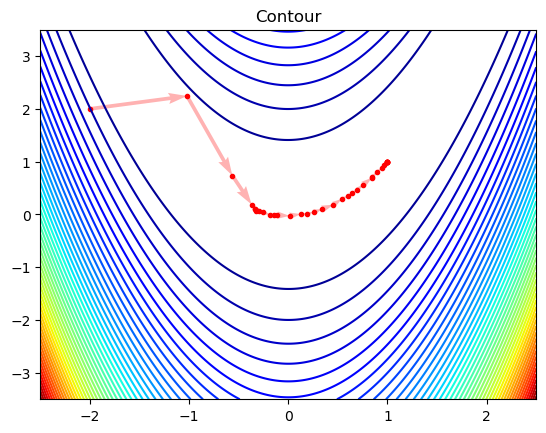

In [4]:
x0 = np.array([-2,2])
x_iter = list() # a list which contains new x for each step of iteration
#apply SciPy library of the optimization algorithm of BFGS
res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True, 'maxiter': 1000}, callback = lambda x: x_iter.append(x))
x_iter.insert(0,x0)
visualize(x_iter)

## Conjugate Gradient (10%)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 34
         Function evaluations: 78
         Gradient evaluations: 78


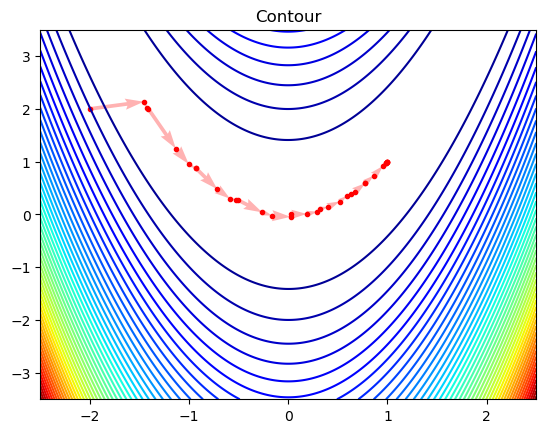

In [5]:
x0 = np.array([-2,2])
x_iter = list()
#apply Scipy library of the optimization algorithm of conjugate gradient
res = minimize(rosen, x0, method='CG', jac=rosen_der, options={'disp': True, 'maxiter': 1000}, callback = lambda x: x_iter.append(x))
x_iter.insert(0,x0)
visualize(x_iter)

## Modified Newton's method with conjugate gradiet (Newton-CG) (10%)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 275
         Function evaluations: 296
         Gradient evaluations: 296
         Hessian evaluations: 275


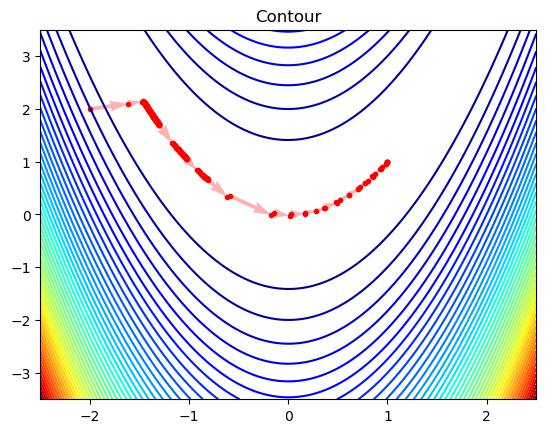

In [6]:
x0 = np.array([-2,2])
x_iter = list()
#apply Scipy library of the optimization algorithm of Newton-CG
res = minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, options={'disp': True, 'maxiter': 1000}, callback = lambda x: x_iter.append(x))
x_iter.insert(0,x0)
visualize(x_iter)

## Gradient Descent with optimal step length (20%)

In [38]:
x0 = np.array([-2,2])

def gd_method(x, learning_rate):
    return rosen(x - learning_rate * rosen_der(x))

def Gradient_Descent(origin, learning_rate, epsilon=0.00001, nMax = 10000):
    step_length = list()
    x_iter = minimize(gd_method, x0 = origin, args = learning_rate, tol = epsilon, options = {'maxiter': nMax, 'return_all': True}).allvecs
    for x in range(1, len(x_iter)):
        step_length.append(x_iter[x][0] - x_iter[x-1][0])
    iter_count = len(x_iter)
    return x_iter, step_length, iter_count

Iteration count:  32


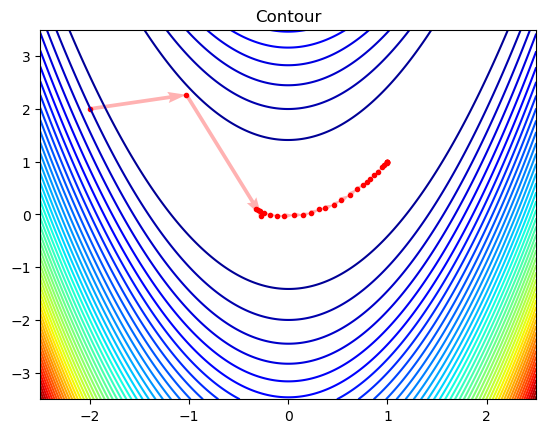

In [39]:
x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.00005)
print("Iteration count: ", iter_count)
visualize(x_iter)

Iteration count:  213


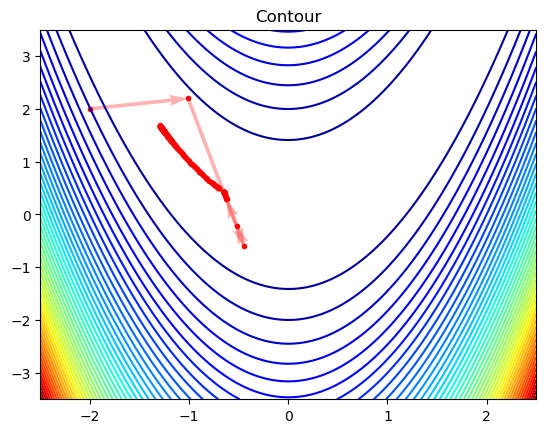

In [19]:
x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 1)
print("Iteration count: ", iter_count)
visualize(x_iter)

Iteration count:  38


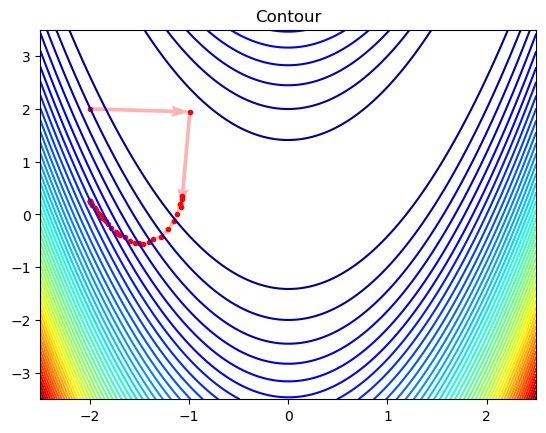

In [20]:
x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.001)
print("Iteration count: ", iter_count)
visualize(x_iter)

Iteration count:  50


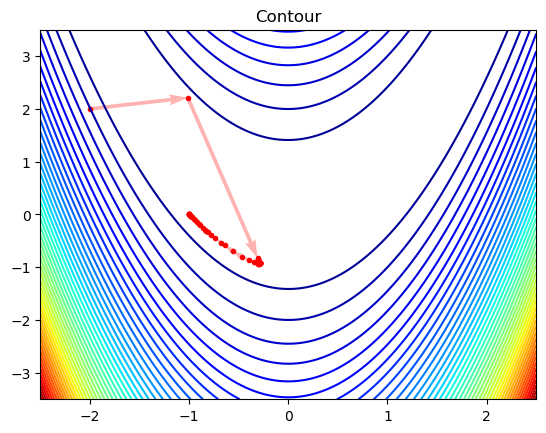

In [26]:
x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.005)
print("Iteration count: ", iter_count)
visualize(x_iter)

## Pure Newton's Method (20%)

In [12]:
def Newton(Grad, Grad2, x, epsilon=0.00001, nMax = 10000 ):
    count = 0
    error = 3
    X = np.array(x)
    x_iter, step_length = list(), list()
    x_iter.append(X)

    while np.linalg.norm(error) > epsilon and count < nMax:
        count += 1
        X_prev = X
        X = X - np.linalg.inv(Grad2([x[0], x[1]])) @ Grad([x[0], x[1]])
        error = X - X_prev
        x[0], x[1] = X[0], X[1]
        step_length.append(error[0])
        x_iter.append(np.array([x[0], x[1]]))

    iter_count = len(x_iter)

    return x_iter, iter_count

Iteration Count: 9

At [1 1], the function value is 0.0


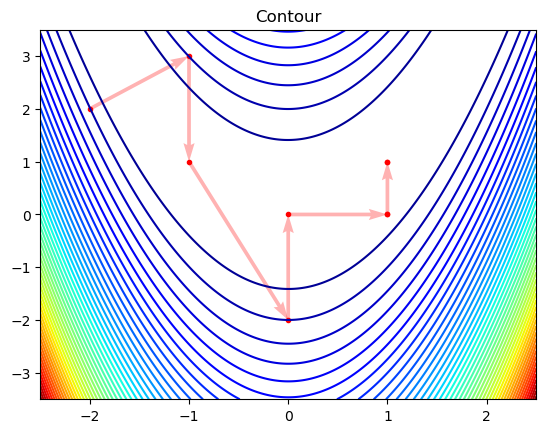

In [13]:
x0 = np.array([-2,2])
x_iter, iter_count = Newton(rosen_der,rosen_hess,x0)
print('Iteration Count: %d\n' % iter_count)
print('At ', x_iter[-1], ', the function value is ', rosen(x_iter[-1]), sep='')
visualize(x_iter)

## Report (30%)

In these assignments, there are several algorithms that are being discussed:
1. BFGS, Conjugate Gradient, Newton CG
2. Gradient Descent with Optimal Step Length
3. Pure Newton's Method

# 1. BFGS, Conjugate Gradient, and Gradient Descent

In terms of the amount of iterations, BFGS, Conjugate Gradient, and Gradient Descent appear identical. However, Gradient descent's learning rate must be small enough to compete with BFGS and Conjugate Gradient. Given the origin, it is demonstrated that these three approaches have a comparable number of iterations [-2,2].

# 2. Gradient Descent
In Gradient Descent Method, the function $$f(v - t f'(v)), t \geq 0$$ should be minimized. Thus, I used `scipy.optimize.minimize()` function to obtain each step the algorithm needs to take in order to converge. 

In my observation, I found that as the learning rate descreases, the algorithm converges easily. Not only it converges easily, the number of iterations also descreases. Thus it is clear that having a miniscule learning step is proven the algorithm converges. 

# 3. Newton's Method
When we have a linear function and want to minimize $f(x)$, there is a possibility to encounter a problem on tuning $\alpha$. If we take $\alpha$ to be too large the we might miss the minimizer, however, if it is too small, then we might take more time for iteration. Thus, tuning $/alpha$ in an optimal way leads us to Newton's Method.

Newton's Method takes form as:
$$
  x_{n+1} = x_n - \frac{1}{f''(x_n)} f'(x_n)
$$
which if we notice it is similar to the root finding algorithm. 

From the first expression, we realize that it generalize to a case of multivariate function. With just simply replace the derivative with the gradient $\nabla f(x_n)$ and the reciprocal of the second derivative with the inverse of the Hessian matrix, we have:
$$
[H f(x_n)] \nabla x_n = - \nabla f(x_n)
$$

So, 
$$
  x_{n+1} = x_n - H_n^{-1} \nabla f(x_n)
$$

From that equation, I converted it into Python code
```python
  X_prev = X
  X = X - np.linalg.inv(Hess([x[0], x[1]])) @ Grad([x[0], x[1]])
```

From the observation, I found that this method has a fast convergence since when it reach near the minimizers it converges quadratically. 